In [97]:
import os

import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

In [98]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

In [99]:
# For static images:
test_files_dir = os.path.join(os.getcwd(), "./test_files")
IMAGE_FILES = [os.path.join(test_files_dir, f) for f in os.listdir(test_files_dir)]
BG_COLOR = (255, 255, 255)

/media/data/Projects/hearai/pose_estimation/./test_files/geogeous hair style.jpg
Nose coordinates: (607.8550367355347, 409.4599084854126)


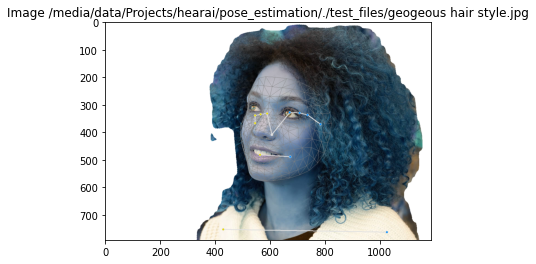

/media/data/Projects/hearai/pose_estimation/./test_files/header-asl-1-dimension.jpeg
Nose coordinates: (320.5641984939575, 562.1621906757355)


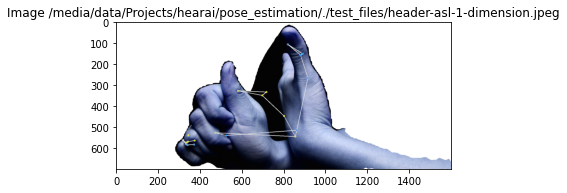

/media/data/Projects/hearai/pose_estimation/./test_files/Round-Faces-Hairstyles-V2-bb3d4ad87275459eb4c10088999a8221.png
Nose coordinates: (477.1970272064209, 296.5089797973633)


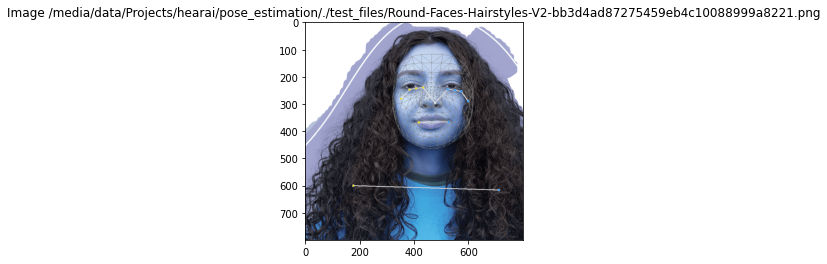

/media/data/Projects/hearai/pose_estimation/./test_files/pose_ballet_test.jpg
Nose coordinates: (160.2920436859131, 152.30068889260292)


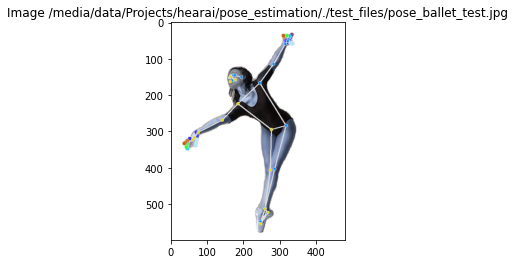

/media/data/Projects/hearai/pose_estimation/./test_files/TqoSJcwDLpk36suHVNe9yJ-320-80.jpg
Nose coordinates: (164.38671112060547, 109.01220560073853)


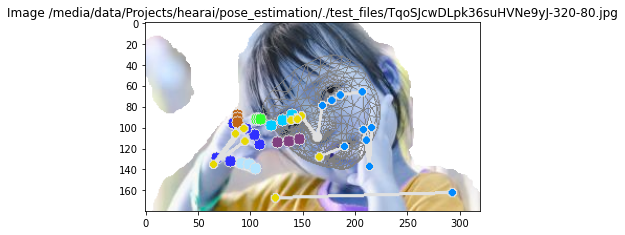

/media/data/Projects/hearai/pose_estimation/./test_files/face-touch.jpg
Nose coordinates: (478.7021577358246, 136.22674083709717)


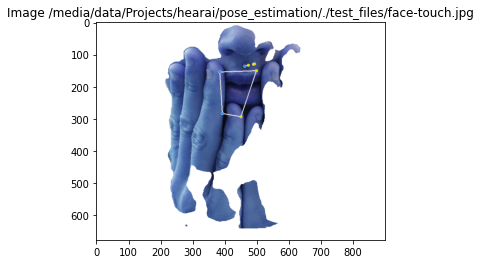

/media/data/Projects/hearai/pose_estimation/./test_files/images1.jpeg
Nose coordinates: (152.13353633880615, 92.52121639251709)


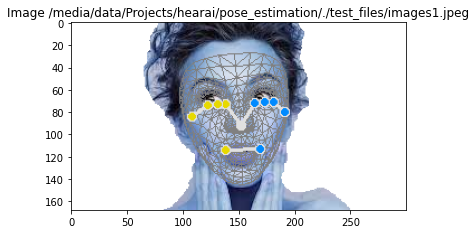

/media/data/Projects/hearai/pose_estimation/./test_files/TqoSJcwDLpk36suHVNe9yJ.jpg
Nose coordinates: (1061.9605779647827, 707.1715146303177)


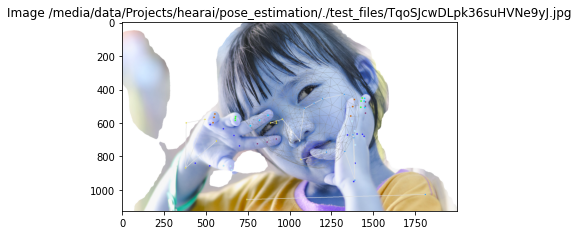

/media/data/Projects/hearai/pose_estimation/./test_files/2020_03_23_90362_1584944819._large.jpg
Nose coordinates: (552.4141788482666, 325.04415345191956)


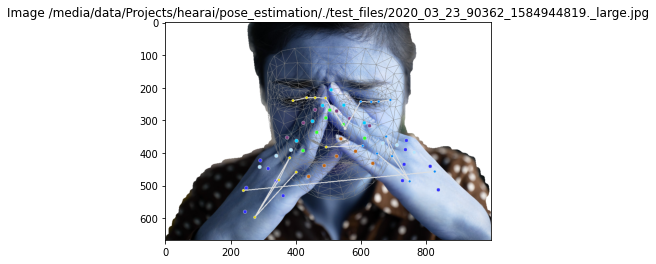

/media/data/Projects/hearai/pose_estimation/./test_files/9d5dbb894ed1236a95d634bb60e5c570.png
Nose coordinates: (388.92037868499756, 290.41435861587524)


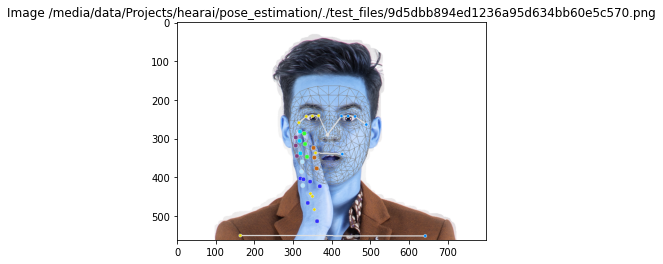

/media/data/Projects/hearai/pose_estimation/./test_files/images.jpeg
Nose coordinates: (129.90671944618225, 66.6802690923214)


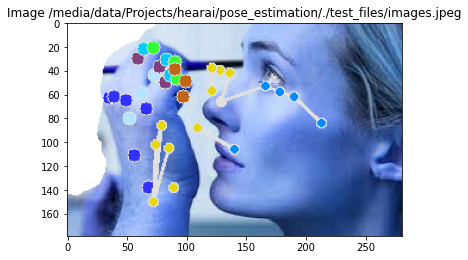

/media/data/Projects/hearai/pose_estimation/./test_files/_108643134_3130.jpg
Nose coordinates: (417.79283809661865, 274.6138758659363)


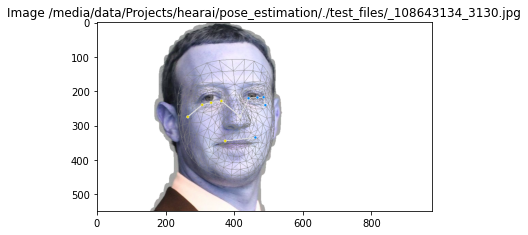

/media/data/Projects/hearai/pose_estimation/./test_files/images4.jpeg
Nose coordinates: (125.49764961004257, 108.78074169158936)


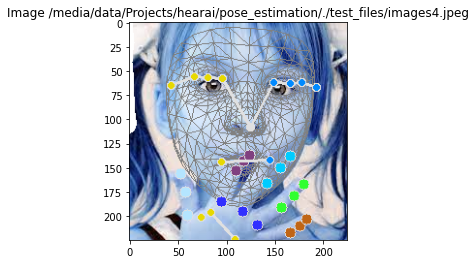

/media/data/Projects/hearai/pose_estimation/./test_files/Tpouching-your-face_1200x628-1200x610.jpg
Nose coordinates: (655.7677030563354, 274.1786715388298)


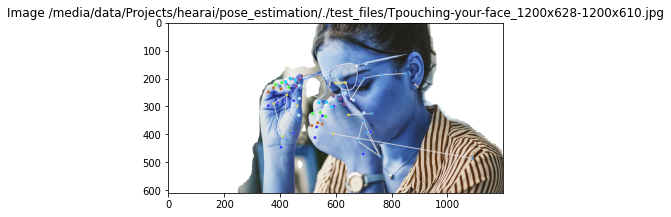

In [100]:
with mp_holistic.Holistic(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    refine_face_landmarks=True) as holistic:
  for idx, file in enumerate(IMAGE_FILES):
    print(file)
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if results.pose_landmarks:
      print(
          f'Nose coordinates: ('
          f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x * image_width}, '
          f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y * image_height})'
      )

    annotated_image = image.copy()
    # Draw segmentation on the image.
    # To improve segmentation around boundaries, consider applying a joint
    # bilateral filter to "results.segmentation_mask" with "image".
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR
    annotated_image = np.where(condition, annotated_image, bg_image)
    # Draw pose, left and right hands, and face landmarks on the image.
    mp_drawing.draw_landmarks(
        annotated_image,
        results.face_landmarks,
        mp_holistic.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_tesselation_style())
    mp_drawing.draw_landmarks(
        annotated_image,
        results.left_hand_landmarks,
        # mp_holistic.HAND_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles
            .get_default_hand_landmarks_style(),
        connection_drawing_spec=None)
    mp_drawing.draw_landmarks(
        annotated_image,
        results.right_hand_landmarks,
        # mp_holistic.HAND_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles
            .get_default_hand_landmarks_style(),
        connection_drawing_spec=None)
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_holistic.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.
        get_default_pose_landmarks_style())
    plt.title('Image {name}'.format(name=file))
    plt.imshow(annotated_image)
    plt.show()
    cv2.imwrite('./output_files/annotated_image' + str(idx) + '.png', annotated_image)
    # Plot pose world landmarks.
    #mp_drawing.plot_landmarks(
    #    results.pose_world_landmarks, mp_holistic.POSE_CONNECTIONS)